# Embeddings

Representing words as numerical fixed length vectors in $n$-dimensional space.

An excellent blog on what embeddings are: https://simonwillison.net/2023/Oct/23/embeddings/. A must read.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
%pylab inline
import pandas as pd
import os
from IPython.display import Image
%load_ext rpy2.ipython

## Word2Vec: Word Embeddings

In a number of Natural Language Processing (NLP) applications
classic methods for language modeling that represent words as high-dimensional,
sparse vectors have been replaced by Neural Language
models that learn word embeddings, i.e., low-dimensional representations
of words, often through the use of neural networks.

- https://en.wikipedia.org/wiki/Word2vec

- https://rare-technologies.com/word2vec-tutorial/

- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

- Google's word2vec page: https://code.google.com/archive/p/word2vec/

- Original word2vec paper: https://arxiv.org/pdf/1301.3781.pdf; and the improved skip-gram model: https://arxiv.org/pdf/1310.4546.pdf

- A simple exposition: https://skymind.ai/wiki/word2vec

- Word2Vec Made Easy: https://towardsdatascience.com/word2vec-made-easy-139a31a4b8ae; https://drive.google.com/file/d/1PqdcFsonU6jNu_BN7dXzcaKD-Yj56eH7/view?usp=sharing

- Word embeddings have proven to be a useful way to do meta analysis and generate new findings from extant literature as shown in [Tshitoyan et al (2019)](https://www.nature.com/articles/s41586-019-1335-8); [pdf](https://drive.google.com/file/d/19Ht2HbzDtRNPE6H2Kk2j_RQRfK8Mvnlv/view?usp=sharing).

- The [Illustrated Word2vec](http://jalammar.github.io/illustrated-word2vec/) by Jay Alammar (this is possibly the best blog on word2vec).


Words have multiple degrees of similarity, such as syntactic similarity and semantic similarity. Word embeddings have been found to pick up both types of similarity. These similarities have been found to support algebraic operations on words, as in the famous word2vec example where vector("Man") + vector("King") - vector("Queen") equals vector("Woman").

- Semantics = the study of meaning
- Syntactic = rules of writing

The output of word2vec is an input to many natural language models using deep learning, such as sentence completion, parsing, information retrieval, document classification, question answering, and named entity recognition.

## What is an "embedding"?

A light introduction: https://technicalwriting.dev/data/embeddings.html

- Think of embeddings as factor analysis for words.

- So if we take a large number of companies and analyze their 10K/Q filings, and want to view them in the light of fewer, simpler dimensions, then we "embed" the documents in a lower dimension space, i.e., we get "document embeddings."

- The other advantage of embeddings is that we convert words/documents of different lengths and frequencies into fixed length vectors in any dimensional space that we may choose. (There is of course art and science here.)

- This is where the intuition of principal components lies, because if $N=10$, then we are saying that 10 dimensions matter and we plot documents in that smaller space.

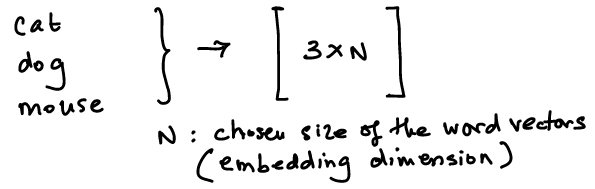

In [ ]:
Image("NLP_images/w2v_basic_idea.png", width=600)

- We can also compute "semantic similarity" across documents. This may be useful in finding a diversified portfolio of companies.

- As we have learnt before, there are 4 common ways in which we may examine similarity:
  1. Cosine similarity
  2. Jaccard similarity
  3. Minimum edit distance
  4. Simple similarity
  
- Let's look at this visualization from Jay Alammar's blog, cited above.

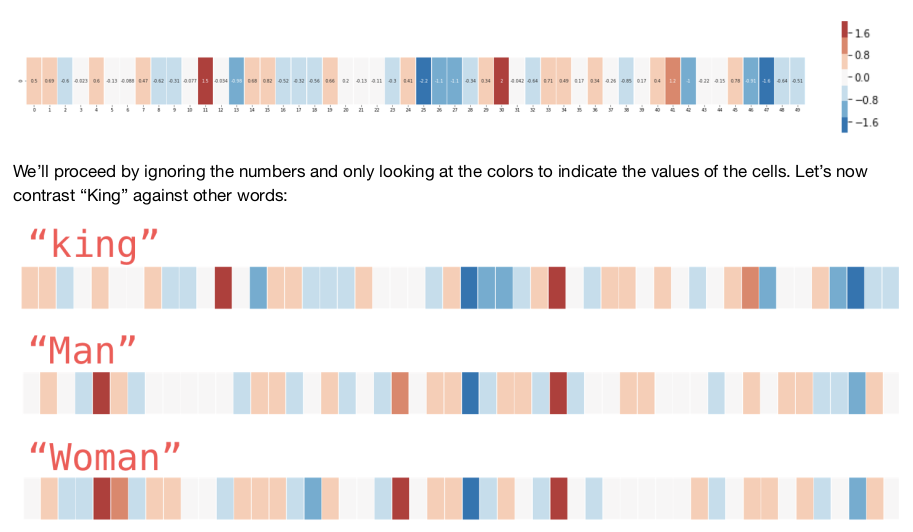

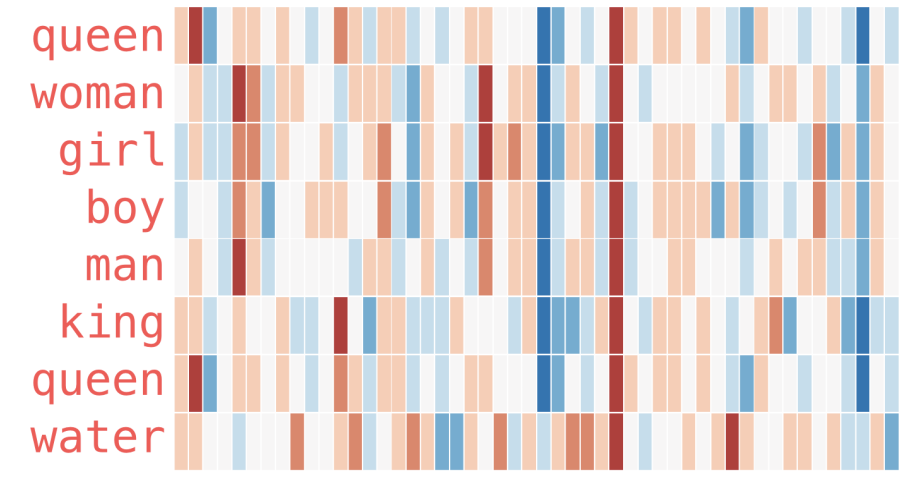

In [ ]:
image_paths = ["NLP_images/w2v_king_queen.png","NLP_images/w2v_kq_similar.png"]
for path in image_paths:
    display(Image(filename=path, width=600))

There are two approaches to word2vec, discussed below. See: https://arxiv.org/pdf/1301.3781.pdf for the original word2vec paper.

In [ ]:
Image("NLP_images/cbow_skipgram.png",width=600)

## Language Models

A language model is a statistical representation of words in a language. This is easily seen in the context of a sentence completion task.

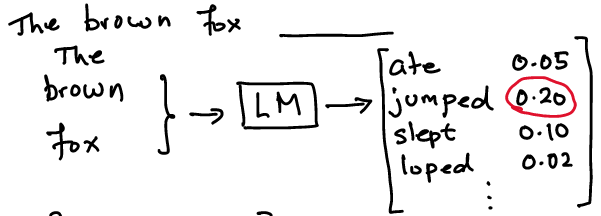

In [ ]:
Image("NLP_images/w2v_LM1.png",width=600)

And word2vec is about using language modeling to get a vector representation of a word.

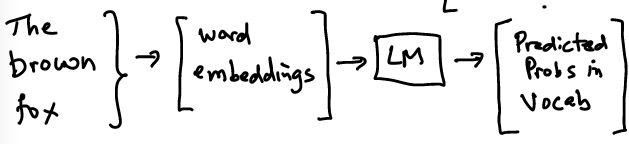

In [ ]:
Image("NLP_images/w2v_LM2.png",width=600)

Let's take an example sentence. We assume that the language model uses a sequence length of 2 words. This is also called the "window length".

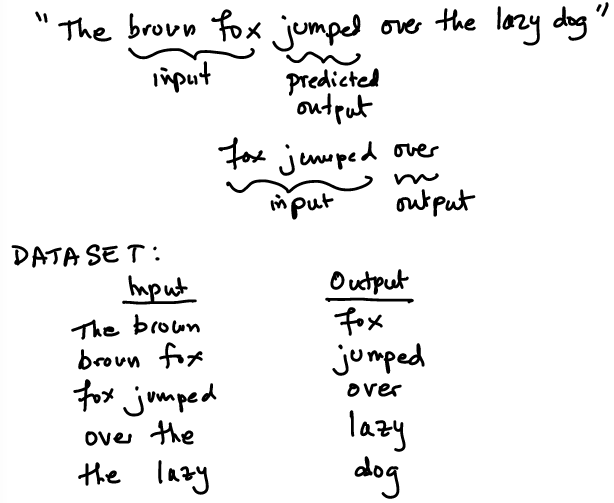

In [ ]:
Image("NLP_images/w2v_example-sentence.png",width=600)

## CBOW

To get better context, we may also choose to use 2 words before and after, i.e., surrounding words. The structure would then be

"The brown fox ___________ over the ..."

The CBOW dataset would be as follows.

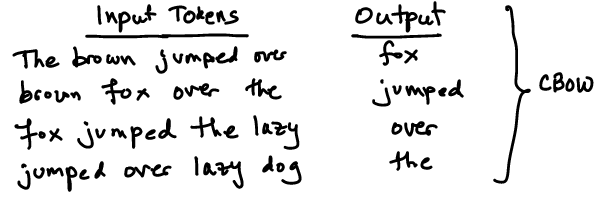

In [ ]:
Image("NLP_images/w2v_CBOW.png",width=600)

## Skip-gram

The skip-gram model re-arranged the input and output as follows.

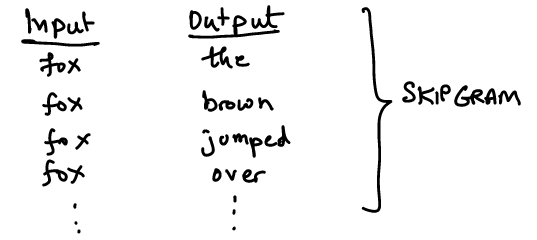

In [ ]:
Image("NLP_images/w2v_skipgram.png",width=600)

## Train a language model

We use this skip-gram dataset to train a model that best predicts the neighboring word.

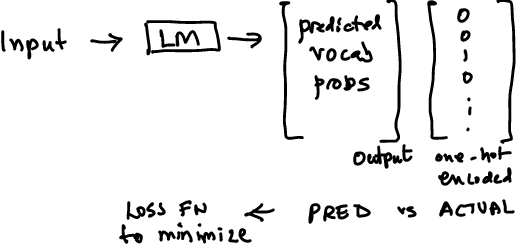

In [ ]:
Image("NLP_images/w2v_LM3.png",width=600)

## Negative Sampling

- Getting word embeddings requires a change in the structure of the dataset for skip-grams.

- Instead of matching inputs to outputs, we take both inputs and outputs and generate the probability that they are neighbors using word embeddings.

- Start with random embeddings and then iterate to find embeddings that match how close the word vectors are if they are neghbors or not.

- We also need to employ **negative sampling**. This could be based on uni-grams or bi-grams. Paper: https://arxiv.org/pdf/1402.3722v1. Negative sampling reduces the computational cost.

- It also makes sense to remove stopwords (sub-sampling) as they appear in the context of all words, and this also reduces the size of the vocab making computation faster.

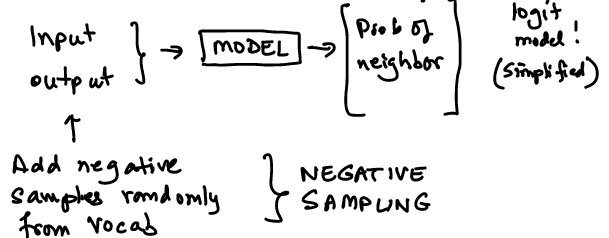

In [ ]:
Image("NLP_images/w2v_negative_sampling.png",width=600)

## Pre-training Word Embeddings

- Randomly initialize "embeddings" matrix.
- Make a copy, the "context" matrix.
- Get the input embeddings from the embeddings matrix and the output embeddings from the context matrix.
- For each word in the embedding matrix and its corresponding sample (true and false neighbors), compute sigmoid similarity.
- Compare to the one-hot encoded target to get the loss function values and iteratively adjust embeddings in the context to get the new embeddings set.
- Update embeddings matrix and context matrix, rinse, repeat.

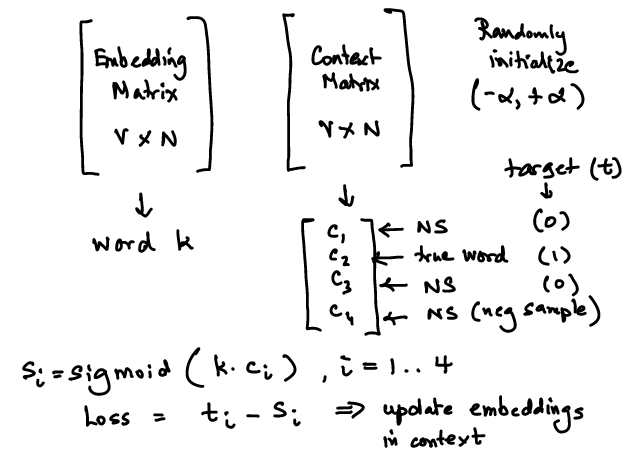

In [ ]:
Image("NLP_images/w2v_pretrain.png",width=600)

As you might imagine, you have to make choices about

1. Window size ($c$)
2. Embedding dimension ($N$)

A simple blog that gives a visual feel:

- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
- http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/

You can download word vectors for many languages from https://fasttext.cc/docs/en/crawl-vectors.html



## Which Layer to Use?

An interesting paper https://arxiv.org/abs/2502.02013 proposes a unified framework of representation quality metrics based on information theory, geometry, and invariance to input perturbations. Key metrics include prompt entropy, dataset entropy, curvature, and augmentation invariance measures. The paper challenges the conventional wisdom that final layers of language models provide the best representations for downstream tasks. It finds that intermediate layers often outperform final layers when viewed through the lens of various metrics.

## Skip-gram math

Given a sequence of words $w_1,...,w_T$ (i.e., $T$ terms), the quantity of interest in the skip-gram model is the conditional probability:

$$
p(w_{t+j} | w_t), \quad -c ≤ j ≤ c, j ≠ 0
$$

Here $c$ is a window around the current word $w_t$ in the text, and $c$ may also be a function of $w_t$. This is what is depicted in the graphic above. The objective function is to maximize the log conditional probability:

$$
L = \frac{1}{T} \sum_{t=1}^T \left[\sum_{-c ≤ j ≤ c, j ≠ 0} \log p(w_{t+j} | w_t) \right]
$$

Assume a vocabulary of $W$ words. Let each word $w$ be represented by a word vector $v(w)$ of dimension $N$. Then the skip-gram model assumes that the conditional probabilities come from a softmax function as follows:

$$
    p(w_j | w_i) = \frac{\exp(v(w_j)^⊤ · v(w_i))}{\sum_{w=1}^W \exp(v(w)^⊤ · v(w_i))}
$$

It requires gradients for each element of the vectors $v(w)$, which is onerous and is of order $O(W)$. Instead of softmax, *hierarchical softmax* is used, which is of order $O(log W)$. An alternative is *negative sampling*, specifically Noise Contrastive Estimation (NCE) as this approximates softmax with logistic functions. Explanation of these approximations and speedups is beyond the scope of these notes, but the reader is referred to [Mikolov et al (2013)](https://arxiv.org/pdf/1310.4546.pdf), or see this [simpler exposition](https://drive.google.com/file/d/0B6YvI7JVO7hjSjZCOFZoOUw5Nm8/view?usp=sharing).

Training is done with neural nets containing a single hidden layer of dimension $N$. The input and output layers are of the same size, and this is your essential autoencoder.

## Heirarchical Softmax

Hierarchical softmax is an alternative to the standard softmax function used in neural networks, particularly in natural language processing tasks. It is designed to improve computational efficiency when dealing with large vocabularies or output spaces.

## Key Features

1. **Tree Structure**: Hierarchical softmax organizes the output vocabulary into a binary tree structure, with words as leaf nodes.

2. **Logarithmic Complexity**: It reduces the computational complexity from O(n) to O(log n), where n is the size of the vocabulary.

3. **Path-based Probability**: The probability of a word is calculated as the product of probabilities along the path from the root to the leaf node representing that word.

## How It Works

1. **Tree Construction**: The vocabulary is arranged in a hierarchical binary tree.

2. **Node Representations**: Each non-leaf node in the tree has a vector representation.

3. **Probability Calculation**: To compute the probability of a word, the model traverses the tree from root to leaf, making binary decisions at each node.

4. **Training**: During training, only the parameters along the path of the target word are updated, significantly reducing the number of computations.

## Advantages

1. **Faster Training**: Reduces the number of parameters that need to be updated in each training step.

2. **Efficient Evaluation**: Allows for faster calculation of individual word probabilities during inference.

3. **Scalability**: Particularly beneficial for tasks with large vocabularies, such as language modeling.

## Considerations

1. **Tree Structure**: The efficiency and performance can be affected by how the tree is constructed. Optimal word assignment in the tree is crucial.

2. **Balanced vs. Huffman Tree**: While balanced trees ensure all words are at the same level, some implementations use Huffman coding to create shorter paths for more frequent words.

3. **Complexity Trade-off**: While it reduces computational complexity, it introduces additional complexity in the model architecture.

Hierarchical softmax offers a significant speedup in training and evaluation of models with large output spaces, making it a valuable technique in natural language processing and other domains with extensive categorical outputs.

**References**:
[1] https://www.reddit.com/r/MachineLearning/comments/338sqx/hierarchical_softmax_why_is_it_faster/
[2] https://building-babylon.net/2017/08/01/hierarchical-softmax/
[3] https://paperswithcode.com/method/hierarchical-softmax


## GloVe (Global Vectors)

A matrix factorization representation of word2vec from Stanford is called [GloVe](https://nlp.stanford.edu/projects/glove/). This is unsupervised learning. I highly recommend reading the web page, it is one of the most beautiful and succint presentations of an algorithmic idea I have encountered.

This is not the first matrix factorization idea, Latent Semantic Analysis (LSA) has been around for some time. LSA factorizes a term-document matrix into lower dimension. But it has its drawbacks and does poorly on word analogy tasks, for which word2vec does much better. GloVe is an approach that marries the ideas in LSA and word2vec in a computationally efficient manner.

As usual, the output from a word embedding model is an embedding matrix $E$ of size $V × N$, where $V$ is the size of the vocabulary (number of words) and $N$ is the dimension of the embedding.

GloVe is based on the co-occurrence matrix of words $X$ of size $V × V$. This matrix depends on the "window" chosen for co-occurrence. The matrix values are also scaled depending on the closeness within the window, resulting in all values in the matrix in $(0,1)$. This matrix is then factorized to get the embedding matrix $E$. This is an extremely high-level sketch of the GloVe algorithm. See [Jeffrey Pennington, Richard Socher, and Christopher D. Manning (2014)](https://nlp.stanford.edu/pubs/glove.pdf); [pdf](https://drive.google.com/file/d/14pqAazsZ4QXYXmBCz0K_Y7pnDnh_Cwt1/view?usp=sharing).  

Technically, GloVe is faster than word2vec, but requires more memory. Also, once the word co-occurrence matrix has been prepared, then $E$ can be quickly generated for any chosen $N$, whereas in word2vec, an entirely fresh neural net has to be estimated, because the hidden layer of the autoencoder has changed in dimension.

For large text corpora, one can intuitively imagine that word embeddings should be roughly similar if the texts are from the same domain. This suggests that pre-trained embeddings $E$ might be a good way to go for NLP applications.

Given the word co-occurrence matrix $X$, let $X_i = \sum_k X_{ik}$ be the number of times various words $k$ occur in the context of word $i$. We can then define the conditional probability, also known as co-occurrence probabilities, the proportion of times word $k$ occurs in the context of $i$.

$$
P_{ik} = \frac{X_{ik}}{X_i}
$$

What's the difference between a word co-occurring and a word appearing "in the context of" another word? In the context of is represented by a conditional probability, whereas co-occurence is similar to a correlation.

For a sample word $k$, the ratio $P_{ik}/P_{jk}$ will be large if word $k$ occurs more in the context of $i$ than word $j$. If both words $i$ and $j$ are not related to word $k$, then we'd expect this ratio to be close to 1. This suggests that the variable we should model is the ratio of co-occurrence probabilities rather than the probabilities themselves. Since these ratios are functions of three words, we may write
$$
F(w_i,w_j,w_k) = \frac{P_{ik}}{P_{jk}}
$$
where $w_i, w_j, w_k ∈  R^d$ are word vectors.

This function may depend on a parameter set. It is desired to have the following properties:

- $F$ should be encoded in the word vector space. It may be easier to work with the form $F(w_i-w_j,w_k) = P_{ik}/P_{jk}$ instead.

- $F$ is a scalar function and may be approximated with a neural net (nonlinear mapping) or a simpler linear mapping, i.e., if we assume that $F(\cdot)=\exp(\cdot)$, then $F$ is defined as follows:
$$
F((w_i-w_j)^⊤ · w_k) = \frac{F(w_i^⊤ · w_k)}{F(w_j^⊤ · w_k)} = \frac{P_{ik}}{P_{jk}} = \frac{X_{ik}/X_i}{X_{jk}/X_j}
$$
which follows from the choice of $F$ as an exponential function.

- It also follows that
$$
w_i^⊤ · w_k = log(P_{ik}) = log(X_{ik}) - log(X_i)
$$
This implies that the entries in the co-occurrence matrix $X$ are related to the word vectors $w$, and that too, globally, hence the "GloVe" nomenclature.

The factorization is implemented using a least-squares fitting procedure (see the [paper](https://nlp.stanford.edu/pubs/glove.pdf) for details). Because the main element of the computations is a dot product, $w_i^⊤ · w_k$ and there is a similar dot product in the softmax of word2vec, it is not surprising that these models are analogous.

- Similar factorizations occur in recommendation engines where non-negative matrix factorization (NMF) is undertaken.

The embeddings idea may be extend to many other cases where co-occurrences exist. For example, user search histories over AirBnB in a search session may be converted into embeddings, see [Grbovic and Cheng (2018)](https://www.kdd.org/kdd2018/accepted-papers/view/real-time-personalization-using-embeddings-for-search-ranking-at-airbnb); [pdf](https://drive.google.com/file/d/16LkdzoYgVmNT28urqVxW1y_Esg7377QG/view?usp=sharing).

## word2vec fitting with neural nets

We are now ready to discuss the actual fitting of the word2vec model with neural nets. The neural net is simple. As before assume that the vocabulary is of size $V$ and the embedding is of size $N$. To make things more concrete, let $V=10,000$ and $N=100$. The neural net will have $V$ nodes in the input and output layers, and $N$ nodes in the single hidden layer. If you are familiar with **autoencoders**, then this is a common NN of that type. The number of parameters (ignoring a bias term) in the NN are $VN = 1,000,000$ for the hidden layer, and, for the output layer (with a bias term), $NV=1,000,100$, i.e., over 2 million parameters to be fit. This is a fairly large NN.

The inputs to the model are based on a window of text around the "target" word, $w$. Suppose the window is of size $c=2$, then $w$ may have up to 4 possible co-occurrence words---2 ahead (denoted $w_1, w_2$) and 2 before (denoted $w_{-1},w_{-2}$) in the window. This leads to 4 rows of input data. How? The input $X$ in all 4 rows is a one-hot vector of $(V-1)$ zeros and a single 1 in the position indexed by $w$. The label $Y$ is a one-hot vector with $V-1$ zeros and a 1 in the position where the leading or lagging word appears. Because a large corpus will have several words, each with up to $2c$ co-occurrence words, the size of the data may also run into the millions or even billions.

The coefficient matrix for the hidden layer is of dimension $V × N$---that is, for every word in the vocabulary, we have a $N$-vector representing it. This indeed, is the entire matrix of word embeddings. Just as an autoencoder compresses the original input, in this case, the neural net projects all the words onto a $N$-dimensional space. We are interested here in the weights matrix of the hidden layer, not the predicted output itself.

However, fitting this NN is no easy task, with millions of parameters, and possibly, billions of observations of data. To reduce the computational load, two simple additional techniques (hacks) are applied.

1. *Subsampling*: We get rid of words that occur too frequently. So we only keep a subsample of words that occur less often. There is a formula for this. Let $\gamma(w)$ be the percentage of word count for $w$ among all words. This is likely to be a small number. We then sort the words based on a function of $\gamma(w)$ and put in a cutoff, where only words with smaller $\gamma(w)$ are retained. This eliminates common words like "the" and "this" and reduces computation time without much impact on the final word embeddings.

2. *Negative sampling*: NNs are usually fitted in batches. In each batch of data all the weights (parameters) are updated. This can be quite costly in computation. In the hidden layer, this would mean updating all $VN=1$ million weights in the hidden layer. Instead, we only update the target word $w$ and 5-10 words that do not co-occur with $w$. We call these words "negatives" and hence the terminology of negative sampling. Negative words are sampled with a probability that is higher if they occur more frequently in the sample.

Both these approaches work well and have resulted in great speed up in fitting the word2vec model. [pdf](https://drive.google.com/file/d/12x9Q1AspyPvb-VTpVtPNq2HY1MjXygJ7/view?usp=sharing)

## Big Data: Reuters News Corpus

https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/reuters.zip

The Reuters-21578 benchmark corpus, ApteMod

id: reuters; size: 6378691; author: ; copyright: ; license: The copyright for the text of newswire articles and Reuters annotations in the Reuters-21578 collection resides with Reuters Ltd. Reuters Ltd. and Carnegie Group, Inc. have agreed to allow the free distribution of this data *for research purposes only*. If you publish results based on this data set, please acknowledge its use, refer to the data set by the name 'Reuters-21578, Distribution 1.0', and inform your readers of the current location of the data set.;

https://pynlp.wordpress.com/2013/12/10/unit-5-part-ii-working-with-files-ii-the-plain-text-corpus-reader-of-nltk/

In [ ]:
# Read in text cleaning functions
import nltk

# Remove punctuations
import string
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

def removePunc(text_array):
    return [removePuncStr(h) for h in text_array]

# Remove numbers
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    return [removeNumbersStr(h) for h in text_array]

# Stemming
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stemText(text_array):
    stemmed_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            h2 = h2 + ' ' + PorterStemmer().stem(w)
        stemmed_text.append(h2)
    return stemmed_text

# Remove Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text

# Write all docs to separate files
def write2textfile(s,filename):
    text_file = open(filename, "w")
    text_file.write(s)
    text_file.close()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Read in the corpus
import nltk
nltk.download('punkt_tab')
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'NLP_data/reuters/training/'
ctext = PlaintextCorpusReader(corpus_root, '.*')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
%%time
#How many docs, paragraphs, sentences, words, characters?
print(len(ctext.fileids()))
print(len(ctext.paras()))
print(len(ctext.sents()))
print(len(ctext.words()))
print(len(ctext.raw()))

7769
8471
40277
1253696
6478471
CPU times: user 20 s, sys: 7.79 s, total: 27.8 s
Wall time: 7min 43s


In [ ]:
#Convert corpus to text array with a full string for each doc
def merge_arrays(word_lists):
    wordlist = []
    for wl in word_lists:
        wordlist = wordlist + wl
    doc = ' '.join(wordlist)
    return doc

In [ ]:
#Run this through the corpus to get a word array for each doc
text_array = []
for p in ctext.paras():
    doc = merge_arrays(p)
    text_array.append(doc)

In [ ]:
#Show the array sample
print(len(text_array))
for j in range(5):
  print(text_array[j])

8471
BAHIA COCOA REVIEW Showers continued throughout the week in the Bahia cocoa zone , alleviating the drought since early January and improving prospects for the coming temporao , although normal humidity levels have not been restored , Comissaria Smith said in its weekly review . The dry period means the temporao will be late this year . Arrivals for the week ended February 22 were 155 , 221 bags of 60 kilos making a cumulative total for the season of 5 . 93 mln against 5 . 81 at the same stage last year . Again it seems that cocoa delivered earlier on consignment was included in the arrivals figures . Comissaria Smith said there is still some doubt as to how much old crop cocoa is still available as harvesting has practically come to an end . With total Bahia crop estimates around 6 . 4 mln bags and sales standing at almost 6 . 2 mln there are a few hundred thousand bags still in the hands of farmers , middlemen , exporters and processors . There are doubts as to how much of this c

In [ ]:
#Clean up the docs using the previous functions
news = text_array
news = removePunc(news)
news = removeNumbers(news)
news = stopText(news)
#news = stemText(news)
news = [j.lower() for j in news]
news[:10]

[' bahia cocoa review showers continued throughout week bahia cocoa zone alleviating drought since early january improving prospects coming temporao although normal humidity levels restored comissaria smith said weekly review the dry period means temporao late year arrivals week ended february bags kilos making cumulative total season mln stage last year again seems cocoa delivered earlier consignment included arrivals figures comissaria smith said still doubt much old crop cocoa still available harvesting practically come end with total bahia crop estimates around mln bags sales standing almost mln hundred thousand bags still hands farmers middlemen exporters processors there doubts much cocoa would fit export shippers experiencing dificulties obtaining bahia superior certificates in view lower quality recent weeks farmers sold good part cocoa held consignment comissaria smith said spot bean prices rose cruzados per arroba kilos bean shippers reluctant offer nearby shipment limited sa

In [ ]:
#Make it into a TFIDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(text_array)
tdm_mat = tfs.toarray().T
print(tdm_mat.shape)

(26283, 8471)


In [ ]:
#Create plain TDM
from sklearn.feature_extraction.text import CountVectorizer

docs = news
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
tdm = df.T
tdm.shape

(24670, 8471)

In [ ]:
x1 = randint(tdm.shape[0]+1)
y1 = randint(tdm.shape[1]+1)
tdm.iloc[x1:x1+20,y1:y1+20]

4072  4073  4074  4075  4076  4077  4078  4079  4080  4081  4082  \
worts         0     0     0     0     0     0     0     0     0     0     0   
would         0     0     0     2     0     0     0     0     0     0     1   
wound         0     0     0     0     0     0     0     0     0     0     0   
wounds        0     0     0     0     0     0     0     0     0     0     0   
woven         0     0     0     0     0     0     0     0     0     0     0   
wpb           0     0     0     0     0     0     0     0     0     0     0   
wpl           0     0     0     0     0     0     0     0     0     0     0   
wpla          0     0     0     0     0     0     0     0     0     0     0   
wpma          0     0     0     0     0     0     0     0     0     0     0   
wqith         0     0     0     0     0     0     0     0     0     0     0   
wrangle       0     0     0     0     0     0     0     0     0     0     0   
wrangles      0     0     0     0     0     0     0     0     0     0     0   
wrangling     0     0     0     0     0     0     0     0     0     0     0   
wrap          0     0     0     0     0     0     0     0     0     0     0   
wrapped       0     0     0     0     0     0     0     0     0     0     0   
wrather       0     0     0     0     0     0     0     0     0     0     0   
wreck         0     0     0     0     0     0     0     0     0     0     0   
wrecked       0     0     0     0     0     0     0     0     0     0     0   
wrench        0     0     0     0     0     0     0     0     0     0     0   
wrested       0     0     0     0     0     0     0     0     0     0     0   

           4083  4084  4085  4086  4087  4088  4089  4090  4091  
worts         0     0     0     0     0     0     0     0     0  
would         2     0     0     0     1     0     2     0     0  
wound         0     0     0     0     0     0     0     0     0  
wounds        0     0     0     0     0     0     0     0     0  
woven         0     0     0     0     0     0     0     0     0  
wpb           0     0     0     0     0     0     0     0     0  
wpl           0     0     0     0     0     0     0     0     0  
wpla          0     0     0     0     0     0     0     0     0  
wpma          0     0     0     0     0     0     0     0     0  
wqith         0     0     0     0     0     0     0     0     0  
wrangle       0     0     0     0     0     0     0     0     0  
wrangles      0     0     0     0     0     0     0     0     0  
wrangling     0     0     0     0     0     0     0     0     0  
wrap          0     0     0     0     0     0     0     0     0  
wrapped       0     0     0     0     0     0     0     0     0  
wrather       0     0     0     0     0     0     0     0     0  
wreck         0     0     0     0     0     0     0     0     0  
wrecked       0     0     0     0     0     0     0     0     0  
wrench        0     0     0     0     0     0     0     0     0  
wrested       0     0     0     0     0     0     0     0     0

In [ ]:
%%capture
!pip install gensim

In [ ]:
%%capture
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
print(len(news))
news[:3]

8471


[' bahia cocoa review showers continued throughout week bahia cocoa zone alleviating drought since early january improving prospects coming temporao although normal humidity levels restored comissaria smith said weekly review the dry period means temporao late year arrivals week ended february bags kilos making cumulative total season mln stage last year again seems cocoa delivered earlier consignment included arrivals figures comissaria smith said still doubt much old crop cocoa still available harvesting practically come end with total bahia crop estimates around mln bags sales standing almost mln hundred thousand bags still hands farmers middlemen exporters processors there doubts much cocoa would fit export shippers experiencing dificulties obtaining bahia superior certificates in view lower quality recent weeks farmers sold good part cocoa held consignment comissaria smith said spot bean prices rose cruzados per arroba kilos bean shippers reluctant offer nearby shipment limited sa

In [ ]:
#Tokenize each document
def textTokenize(text_array):
    textTokens = []
    for h in text_array:
        textTokens.append(h.split(' '))
    return textTokens

In [ ]:
sentences = textTokenize(news)
print(len(sentences))
print(type(sentences))
sentences[:2][:10]

8471
<class 'list'>


[['',
  'bahia',
  'cocoa',
  'review',
  'showers',
  'continued',
  'throughout',
  'week',
  'bahia',
  'cocoa',
  'zone',
  'alleviating',
  'drought',
  'since',
  'early',
  'january',
  'improving',
  'prospects',
  'coming',
  'temporao',
  'although',
  'normal',
  'humidity',
  'levels',
  'restored',
  'comissaria',
  'smith',
  'said',
  'weekly',
  'review',
  'the',
  'dry',
  'period',
  'means',
  'temporao',
  'late',
  'year',
  'arrivals',
  'week',
  'ended',
  'february',
  'bags',
  'kilos',
  'making',
  'cumulative',
  'total',
  'season',
  'mln',
  'stage',
  'last',
  'year',
  'again',
  'seems',
  'cocoa',
  'delivered',
  'earlier',
  'consignment',
  'included',
  'arrivals',
  'figures',
  'comissaria',
  'smith',
  'said',
  'still',
  'doubt',
  'much',
  'old',
  'crop',
  'cocoa',
  'still',
  'available',
  'harvesting',
  'practically',
  'come',
  'end',
  'with',
  'total',
  'bahia',
  'crop',
  'estimates',
  'around',
  'mln',
  'bags',
  'sal

In [ ]:
#Train the model on Word2Vec
model = gensim.models.Word2Vec(sentences, min_count=1)
type(model)

gensim.models.word2vec.Word2Vec

In [ ]:
model.wv['crop']

array([-0.78831786,  1.1003648 ,  0.4417799 , -1.1519256 ,  0.5692781 ,
       -2.0528002 , -0.14682302,  1.2340673 , -0.09742307, -0.07409947,
        0.44541472, -0.9851562 ,  0.1659347 ,  0.93349004,  0.721723  ,
       -0.1768267 , -0.3713888 , -0.46597144, -0.90928066,  0.1592874 ,
        0.5400904 , -0.0254357 ,  0.1263449 , -0.76914275,  0.2828601 ,
       -0.08375855,  0.16089447,  0.35982478, -0.86777884, -0.74708635,
        1.22574   , -1.0116901 ,  0.718131  , -0.7872795 ,  0.17132513,
        0.38089687,  0.6845214 , -1.0001127 , -0.9660871 , -1.3899158 ,
       -0.465942  ,  0.26140383,  0.14304273, -1.5148377 , -0.4532607 ,
        1.2283373 , -0.09266065,  0.77032   , -1.0092031 , -0.03157449,
        0.20811841, -0.2906286 , -1.169783  ,  0.37453187, -0.69711363,
       -0.00501986,  2.0179157 ,  0.10001551,  0.64706916, -0.58607364,
       -0.948447  ,  0.0765906 , -0.03919775,  0.06606796, -1.1509088 ,
        0.9274904 , -0.50893164, -0.35836077, -1.3791882 ,  0.58

In [ ]:
model.wv.most_similar('crop',topn=5)

[('harvest', 0.9572710990905762),
 ('season', 0.9248606562614441),
 ('winter', 0.9064502120018005),
 ('planted', 0.8971642255783081),
 ('maize', 0.8964122533798218)]

In [ ]:
model.wv.most_similar('billion',topn=5)

[('marks', 0.8050153255462646),
 ('turnover', 0.8029889464378357),
 ('doubled', 0.8008073568344116),
 ('lire', 0.7986522316932678),
 ('balance', 0.7971354126930237)]

In [ ]:
model.wv.similarity('sale','stock')

0.29583097

In [ ]:
model.wv.most_similar('bank')

[('banks', 0.8359975814819336),
 ('england', 0.7487977743148804),
 ('bankers', 0.7347875237464905),
 ('bundesbank', 0.7240387201309204),
 ('paper', 0.7148200273513794),
 ('central', 0.714160680770874),
 ('savings', 0.7059804201126099),
 ('rediscount', 0.6918702721595764),
 ('widest', 0.6880464553833008),
 ('window', 0.6851202249526978)]

In [ ]:
model.wv.most_similar(positive=['france', 'franc'], negative=['england'], topn=5)

[('minus', 0.8406189680099487),
 ('korea', 0.8293598294258118),
 ('rises', 0.7983402013778687),
 ('completions', 0.7918917536735535),
 ('narrows', 0.7831141352653503)]

In [ ]:
model.wv.most_similar(positive=['german', 'french'], negative=['mark'], topn=5)

[('china', 0.7904940843582153),
 ('slows', 0.7785072326660156),
 ('germany', 0.7693665623664856),
 ('west', 0.7638334631919861),
 ('recipient', 0.7627472281455994)]

In [ ]:
model.wv.most_similar(positive=['dollar', 'long'], negative=['yen'], topn=5)

[('longer', 0.808849036693573),
 ('medium', 0.8079187870025635),
 ('near', 0.7585659623146057),
 ('see', 0.7578569054603577),
 ('think', 0.7536298036575317)]

In [ ]:
model.wv.most_similar(positive=['wheat', 'harvest'], negative=['corn'], topn=5)

[('exported', 0.9167753458023071),
 ('season', 0.9099537134170532),
 ('whites', 0.9078139662742615),
 ('maize', 0.9058653712272644),
 ('roasted', 0.9049701690673828)]

## Using Sent2Vec

https://github.com/epfml/sent2vec

https://rare-technologies.com/sent2vec-an-unsupervised-approach-towards-learning-sentence-embeddings/

https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d

In [ ]:
%%capture
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en

In [ ]:
%%capture
!pip install sent2vec
import nltk
nltk.download('punkt')
from scipy import spatial
from sent2vec.vectorizer import Vectorizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentences = [
    "The traveling salesman problem is a classic hard problem in computer science.",
    "The traveling salesman problem recently achieved a better solution, kudos to computer science.",
]

vectorizer = Vectorizer()

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
vectorizer.run(sentences)
vectors = vectorizer.vectors
print(len(vectors))
print(len(vectors[0]))

2
768


In [ ]:
from scipy import spatial
result = 1 - spatial.distance.cosine(vectors[0], vectors[1])
result

0.9466108580124408

## Doc2Vec

This algorithm is analogous to word2vec but instead of word embeddings it generates document embeddings. Documents that are semantically similar with be closer to each other in the embedding space.

- The original paper by Quoc Le and Tomas Mikolov is here: https://arxiv.org/abs/1405.4053; https://drive.google.com/file/d/1NBtLERtwRWy_RNVG5FKqRG-8oQTedSAz/view?usp=sharing

- A simple blog post that offers some more explanation: https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e; https://drive.google.com/file/d/1GxzHpmdRac7n8wM9QqXFhmelkmBNjU8A/view?usp=sharing

Let's use the Reuters news corpus as an example.

In [ ]:
#Recreate the documents (without stemming to retain whole words)
#Clean up the docs using the previous functions
news = text_array
news = removePunc(news)
news = removeNumbers(news)
news = stopText(news)
#news = stemText(news)
news = [j.lower() for j in news]
sentences = textTokenize(news)
print(len(sentences))

8471


In [ ]:
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
n_news = range(len(news))
docs = [TaggedDocument(simple_preprocess(j),[i]) for j,i in zip(news,n_news)]

In [ ]:
list(docs[:2])

[TaggedDocument(words=['bahia', 'cocoa', 'review', 'showers', 'continued', 'throughout', 'week', 'bahia', 'cocoa', 'zone', 'alleviating', 'drought', 'since', 'early', 'january', 'improving', 'prospects', 'coming', 'temporao', 'although', 'normal', 'humidity', 'levels', 'restored', 'comissaria', 'smith', 'said', 'weekly', 'review', 'the', 'dry', 'period', 'means', 'temporao', 'late', 'year', 'arrivals', 'week', 'ended', 'february', 'bags', 'kilos', 'making', 'cumulative', 'total', 'season', 'mln', 'stage', 'last', 'year', 'again', 'seems', 'cocoa', 'delivered', 'earlier', 'consignment', 'included', 'arrivals', 'figures', 'comissaria', 'smith', 'said', 'still', 'doubt', 'much', 'old', 'crop', 'cocoa', 'still', 'available', 'harvesting', 'practically', 'come', 'end', 'with', 'total', 'bahia', 'crop', 'estimates', 'around', 'mln', 'bags', 'sales', 'standing', 'almost', 'mln', 'hundred', 'thousand', 'bags', 'still', 'hands', 'farmers', 'middlemen', 'exporters', 'processors', 'there', 'doubt

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(docs, min_count=1)
type(model)

gensim.models.doc2vec.Doc2Vec

In [ ]:
#Doc vector: note here we use the original document tokens, not the tagged version
x = sentences[0]
print(x)
model.infer_vector(x)

['', 'bahia', 'cocoa', 'review', 'showers', 'continued', 'throughout', 'week', 'bahia', 'cocoa', 'zone', 'alleviating', 'drought', 'since', 'early', 'january', 'improving', 'prospects', 'coming', 'temporao', 'although', 'normal', 'humidity', 'levels', 'restored', 'comissaria', 'smith', 'said', 'weekly', 'review', 'the', 'dry', 'period', 'means', 'temporao', 'late', 'year', 'arrivals', 'week', 'ended', 'february', 'bags', 'kilos', 'making', 'cumulative', 'total', 'season', 'mln', 'stage', 'last', 'year', 'again', 'seems', 'cocoa', 'delivered', 'earlier', 'consignment', 'included', 'arrivals', 'figures', 'comissaria', 'smith', 'said', 'still', 'doubt', 'much', 'old', 'crop', 'cocoa', 'still', 'available', 'harvesting', 'practically', 'come', 'end', 'with', 'total', 'bahia', 'crop', 'estimates', 'around', 'mln', 'bags', 'sales', 'standing', 'almost', 'mln', 'hundred', 'thousand', 'bags', 'still', 'hands', 'farmers', 'middlemen', 'exporters', 'processors', 'there', 'doubts', 'much', 'cocoa

array([ 0.01610369, -0.11012551, -0.17446457,  0.839011  ,  0.62872   ,
        0.46271837,  0.1261991 ,  0.2942712 , -0.11133458, -0.17863296,
       -0.30268124, -0.64418983, -0.08268481, -0.05060583,  0.2368595 ,
        0.4863144 ,  0.7094341 ,  0.0222347 , -0.04607633,  0.09974248,
       -0.8796049 , -0.39041805, -0.02329603, -0.6734122 ,  0.6673922 ,
        0.23597603, -0.6609551 , -0.67023855, -0.16046697,  0.5534958 ,
        0.8566938 , -0.2787453 ,  0.31867927, -0.92015624, -0.03693378,
        0.5057061 , -0.14727688,  0.10166696,  0.26359785, -0.64860624,
       -0.71458805, -1.2542522 ,  0.35766828, -0.4092941 , -0.01952751,
       -0.68486255, -0.13543725,  0.5583174 ,  0.8373535 , -0.18045779,
        0.58316576, -0.09152338,  0.5611558 ,  0.6182105 , -1.2262315 ,
        0.80286807, -1.3582598 ,  0.1845881 , -0.8943391 ,  0.63653904,
        0.60632324, -0.14887977, -0.24380885, -0.6568888 , -0.04694789,
       -0.10166165,  0.11248185,  0.430434  , -1.0128896 ,  0.54

In [ ]:
# Pick any document from the test corpus and infer a vector from the model
doc_id = 0
inferred_vector = model.infer_vector(sentences[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(sentences[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(docs[sims[index][0]].words)))

Test Document (0): « bahia cocoa review showers continued throughout week bahia cocoa zone alleviating drought since early january improving prospects coming temporao although normal humidity levels restored comissaria smith said weekly review the dry period means temporao late year arrivals week ended february bags kilos making cumulative total season mln stage last year again seems cocoa delivered earlier consignment included arrivals figures comissaria smith said still doubt much old crop cocoa still available harvesting practically come end with total bahia crop estimates around mln bags sales standing almost mln hundred thousand bags still hands farmers middlemen exporters processors there doubts much cocoa would fit export shippers experiencing dificulties obtaining bahia superior certificates in view lower quality recent weeks farmers sold good part cocoa held consignment comissaria smith said spot bean prices rose cruzados per arroba kilos bean shippers reluctant offer nearby s

<ipython-input-49-6c0c75c561b1>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
